In [4]:
!ls ../../../data

IBM_monthly.csv                      inflation-consumer-prices-annual.csv
Monthly_CO2_Concentrations.csv       or_monthly_mean_temp_1895-2019.csv
chemical-concentration-readings.csv  or_monthly_mean_temp_1895-2019.txt
coloradoflow.dat


In [5]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [6]:
DATA = '../../../data'
df = pd.read_csv(f'{DATA}/chemical-concentration-readings.csv')
print(df.shape)
df.head()

(197, 2)


,Timestamp,Chemical conc.
0,1975-01-01 00:00:00,17.0
1,1975-01-01 02:00:00,16.6
2,1975-01-01 04:00:00,16.3
3,1975-01-01 06:00:00,16.1
4,1975-01-01 08:00:00,17.1


GOAL: Convert from bi-hourly to daily using means

In [7]:
df.index = df.Timestamp.map(
    lambda t: pd.to_datetime(t, format='%Y-%m-%d %H:%M:%S'))
df.head()

,Timestamp,Chemical conc.
Timestamp,,
1975-01-01 00:00:00,1975-01-01 00:00:00,17.0
1975-01-01 02:00:00,1975-01-01 02:00:00,16.6
1975-01-01 04:00:00,1975-01-01 04:00:00,16.3
1975-01-01 06:00:00,1975-01-01 06:00:00,16.1
1975-01-01 08:00:00,1975-01-01 08:00:00,17.1


In [12]:
daily_mean = df['Chemical conc.'].resample('D').mean()
daily_median = df['Chemical conc.'].resample('D').median()

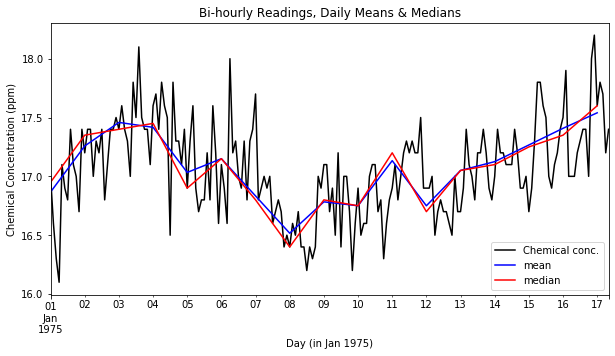

In [15]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
df['Chemical conc.'].plot(ax=ax, color='k')
daily_mean.plot(ax=ax, color='b', label='mean')
daily_median.plot(ax=ax, color='r', label='median')
ax.set_title('Bi-hourly Readings, Daily Means & Medians')
ax.set_xlabel('Day (in Jan 1975)')
ax.set_ylabel('Chemical Concentration (ppm)')
ax.legend();